In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

PWD = "/media/juancho/TOSHIBA EXT/SC_evaluations_paper/sc2-benchmark"

PATH=os.path.join(PWD,"entropic_student/FSIM_N")

items = os.listdir(PATH)

directories = [item for item in items if os.path.isdir(os.path.join(PATH,item))]

Final_report = pd.DataFrame()

for config in directories:
    dir = os.path.join(PATH,config)
    full_report= pd.read_csv(os.path.join(dir,"Misclassified_images_report.csv"),index_col=[0])  
    #print(full_report.head)
    full_report["FsimID"]=None    
    index=(full_report['layer_start']>=-1)
    full_report.loc[index,'FsimID']=config # I capture the folder name and assign it to eavery roww of the dataframe
    #full_report['bit_faulty_pos']=np.log2(full_report['bitmask']).astype(int)
    full_report['split_config']=full_report['FsimID'].apply(lambda x: x.split('_')[0])
    Final_report=pd.concat([Final_report,full_report],axis=0,ignore_index=True)
    
index = (Final_report['split_config']=='cnf77')
Final_report.loc[index,'split_config']=0
index = (Final_report['split_config']=='cnf1')
Final_report.loc[index,'split_config']=1
index = (Final_report['split_config']=='cnf2')
Final_report.loc[index,'split_config']=2
index = (Final_report['split_config']=='cnf3')
Final_report.loc[index,'split_config']=3
index = (Final_report['split_config']=='cnf6')
Final_report.loc[index,'split_config']=4
index = (Final_report['split_config']=='cnf9')
Final_report.loc[index,'split_config']=5
index = (Final_report['split_config']=='cnf12')
Final_report.loc[index,'split_config']=6

index = (Final_report['split_config']=='cnf0.08')
Final_report.loc[index,'split_config']=7
index = (Final_report['split_config']=='cnf5.12')
Final_report.loc[index,'split_config']=8

Final_report = Final_report.sort_values(['split_config'],ascending=True)

index = (Final_report['split_config']==0)
Final_report.loc[index,'split_config']='BaseLine'
index = (Final_report['split_config']==1)
Final_report.loc[index,'split_config']='CR+BQ(1)'
index = (Final_report['split_config']==2)
Final_report.loc[index,'split_config']='CR+BQ(2)'
index = (Final_report['split_config']==3)
Final_report.loc[index,'split_config']='CR+BQ(3)'
index = (Final_report['split_config']==4)
Final_report.loc[index,'split_config']='CR+BQ(6)'
index = (Final_report['split_config']==5)
Final_report.loc[index,'split_config']='CR+BQ(9)'
index = (Final_report['split_config']==6)
Final_report.loc[index,'split_config']='CR+BQ(12)'
index = (Final_report['split_config']==7)
Final_report.loc[index,'split_config']='VAE-B0.08'
index = (Final_report['split_config']==8)
Final_report.loc[index,'split_config']='VAE-B5.12'
print(Final_report.head())


/home/juancho/miniconda3/envs/sc2-benchmark-fsim/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


: 

       FaultID  imID  layer  kernel  channel  row  col   bitmask  G_Target  \
0  F_1_results    15      1       9        0  1.0  0.0  33554432         5   
1  F_1_results    16      1       9        0  1.0  0.0  33554432         4   
2  F_1_results    17      1       9        0  1.0  0.0  33554432         9   
3  F_1_results    23      1       9        0  1.0  0.0  33554432         3   
4  F_1_results    27      1       9        0  1.0  0.0  33554432         5   

   F_clas0  ...  G_clas3  G_clas4    G_pred0   G_pred1   G_pred2   G_pred3  \
0      1.0  ...      3.0      4.0   6.105243  3.483861  2.882835  1.168008   
1      6.0  ...      5.0      3.0   6.555499  4.478031  4.213173  2.175740   
2      2.0  ...      0.0      6.0   5.685878  4.990346  2.849079  2.678142   
3      1.0  ...      4.0      5.0  10.274055  5.234021  0.590727  0.238722   
4      6.0  ...      7.0      1.0   6.143901  3.516423  2.468713  2.076474   

    G_pred4                      FsimID  bit_faulty_pos  split

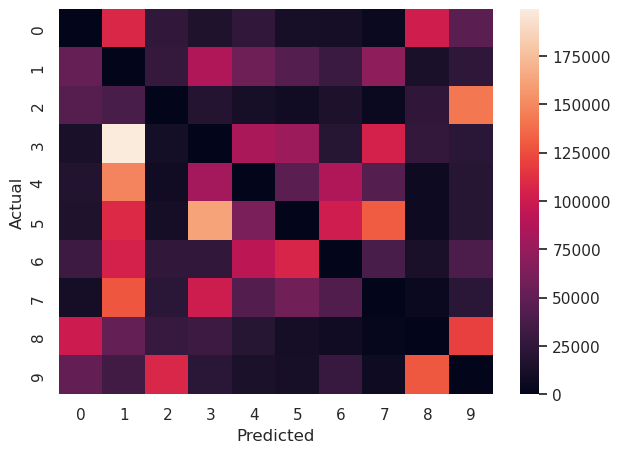

In [3]:
print(Final_report.head())
print(Final_report.head())

index = (Final_report['G_Target']==Final_report['G_clas0']) & (Final_report['F_pred0'].isna()==False) 

filtered_data=Final_report.loc[index][['G_clas0','F_clas0']].astype(int)

confusion_matrix = pd.crosstab(filtered_data['G_clas0'], filtered_data['F_clas0'], rownames=['Actual'], colnames=['Predicted'])

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.heatmap(confusion_matrix)

/tmp/ipykernel_2100004/2434456003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['G_diff'] = filtered_data['G_pred0']-filtered_data['G_pred1']
/tmp/ipykernel_2100004/2434456003.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['F_diff'] = filtered_data['F_pred0']-filtered_data['F_pred1']
/tmp/ipykernel_2100004/2434456003.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


               imID         layer        kernel       channel           row  \
count  2.900032e+06  2.900032e+06  2.900032e+06  2.900032e+06  2.798496e+06   
mean   3.913031e+03  5.685969e+00  1.790292e+01  1.135879e+01  5.746740e-01   
std    2.326257e+03  4.667045e+00  1.748397e+01  1.715064e+01  8.501691e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.885000e+03  1.000000e+00  6.000000e+00  0.000000e+00  0.000000e+00   
50%    3.852000e+03  5.000000e+00  1.200000e+01  2.000000e+00  0.000000e+00   
75%    5.980000e+03  9.000000e+00  2.400000e+01  1.600000e+01  1.000000e+00   
max    7.935000e+03  1.500000e+01  7.100000e+01  7.100000e+01  4.000000e+00   

                col       bitmask      G_Target       F_clas0       F_clas1  \
count  2.798496e+06  2.900032e+06  2.900032e+06  2.900032e+06  2.900032e+06   
mean   5.908195e-01  4.111528e+08  4.553839e+00  4.362759e+00  4.479166e+00   
std    8.661868e-01  7.407918e+08  2.619852e+00  2.

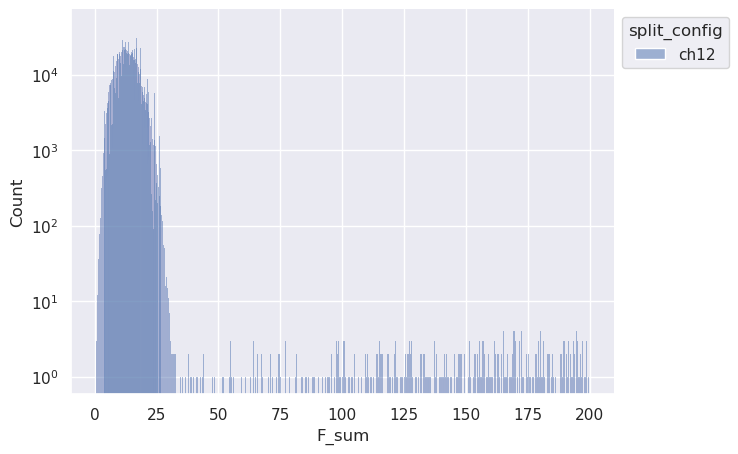

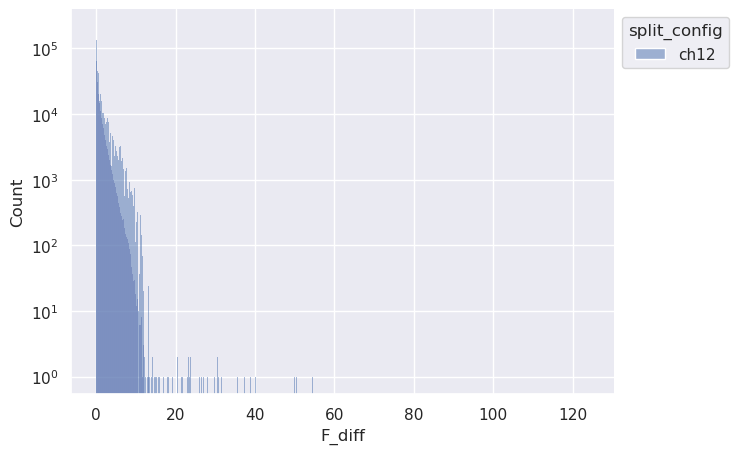

In [12]:
index = (Final_report['G_Target']==Final_report['G_clas0']) & (Final_report['F_pred0'].isna()==False) & (Final_report['bit_faulty_pos']!=30)

filtered_data=Final_report.loc[index]

filtered_data['G_diff'] = filtered_data['G_pred0']-filtered_data['G_pred1']
filtered_data['F_diff'] = filtered_data['F_pred0']-filtered_data['F_pred1']

filtered_data['G_sum'] = filtered_data['G_pred0']+filtered_data['G_pred1']+filtered_data['G_pred2']+filtered_data['G_pred3']+filtered_data['G_pred4']
filtered_data['F_sum'] = filtered_data['F_pred0']+filtered_data['F_pred1']+filtered_data['F_pred2']+filtered_data['F_pred3']+filtered_data['F_pred4']

print(filtered_data.describe())

filtered_data=filtered_data.loc[(filtered_data['F_sum']<200) & (filtered_data['F_sum']>-200)][['G_diff','F_diff','F_sum','G_sum','split_config']]


sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
#ax=sns.barplot(data=filtered_data,x='G_Target',y='G_diff')
#ax=sns.barplot(data=filtered_data,x='G_Target',y='F_diff')
ax=sns.histplot(data=filtered_data,x='F_sum',hue='split_config',color='red')
ax=sns.histplot(data=filtered_data,x='G_sum',hue='split_config',color='blue')
ax.set_yscale('log')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
#ax=sns.barplot(data=filtered_data,x='G_Target',y='G_diff')
#ax=sns.barplot(data=filtered_data,x='G_Target',y='F_diff')
ax=sns.histplot(data=filtered_data,x='F_diff',hue='split_config',color='red')
ax=sns.histplot(data=filtered_data,x='G_diff',hue='split_config',color='blue')
ax.set_yscale('log')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/tmp/ipykernel_2100004/1620471823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['G_diff'] = abs(filtered_data['G_pred0']-filtered_data['G_pred1'])
/tmp/ipykernel_2100004/1620471823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['F_diff'] = abs(filtered_data['F_pred0']-filtered_data['F_pred1'])
/tmp/ipykernel_2100004/1620471823.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

               imID         layer        kernel       channel           row  \
count  2.900032e+06  2.900032e+06  2.900032e+06  2.900032e+06  2.798496e+06   
mean   3.913031e+03  5.685969e+00  1.790292e+01  1.135879e+01  5.746740e-01   
std    2.326257e+03  4.667045e+00  1.748397e+01  1.715064e+01  8.501691e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.885000e+03  1.000000e+00  6.000000e+00  0.000000e+00  0.000000e+00   
50%    3.852000e+03  5.000000e+00  1.200000e+01  2.000000e+00  0.000000e+00   
75%    5.980000e+03  9.000000e+00  2.400000e+01  1.600000e+01  1.000000e+00   
max    7.935000e+03  1.500000e+01  7.100000e+01  7.100000e+01  4.000000e+00   

                col       bitmask      G_Target       F_clas0       F_clas1  \
count  2.798496e+06  2.900032e+06  2.900032e+06  2.900032e+06  2.900032e+06   
mean   5.908195e-01  4.111528e+08  4.553839e+00  4.362759e+00  4.479166e+00   
std    8.661868e-01  7.407918e+08  2.619852e+00  2.

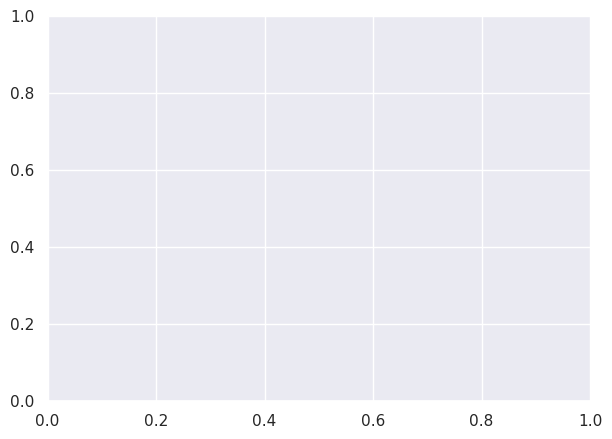

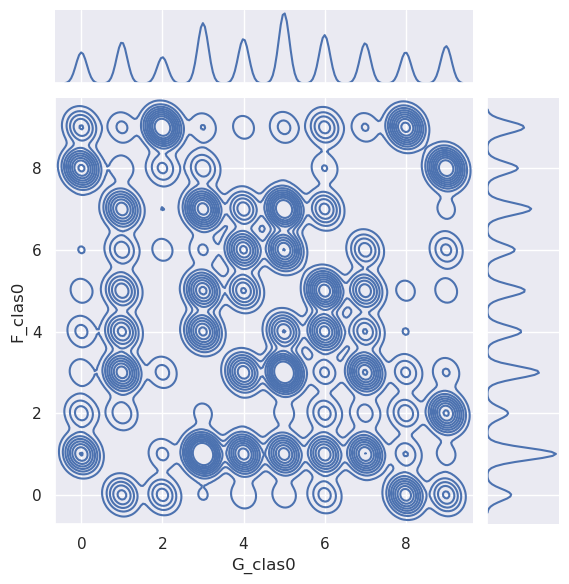

In [13]:
index = (Final_report['G_Target']==Final_report['G_clas0']) & (Final_report['F_pred0'].isna()==False) & (Final_report['bit_faulty_pos']!=30)

filtered_data=Final_report.loc[index]

filtered_data['G_diff'] = abs(filtered_data['G_pred0']-filtered_data['G_pred1'])
filtered_data['F_diff'] = abs(filtered_data['F_pred0']-filtered_data['F_pred1'])
filtered_data['T1_diff'] = abs(filtered_data['G_pred0']-filtered_data['F_pred0'])

filtered_data['G_sum'] = filtered_data[['G_pred0','G_pred1','G_pred2','G_pred3','G_pred4']].max(axis=1)
filtered_data['F_sum'] = filtered_data[['F_pred0','F_pred1','F_pred2','F_pred3','F_pred4']].min(axis=1)

print(filtered_data.describe())

filtered_dataF=filtered_data[['G_Target','G_clas0','F_clas0']]

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.jointplot(
    data=filtered_dataF,
    x="G_clas0", y="F_clas0",
    kind="kde",
)